In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
    

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=rikitea
Processing Record 2 | Alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=alofi
Processing Record 3 | Puerto Leguizamo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=puerto%20leguizamo
Processing Record 4 | Hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=hobart
Processing Record 5 | Tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=tiksi
Processing Record 6 | Atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=atuona
Processing Record 7 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperi

Processing Record 57 | Parana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=parana
Processing Record 58 | Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=saint-pierre
Processing Record 59 | Kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=kapaa
Processing Record 60 | Ypsonas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=ypsonas
Processing Record 61 | Shetpe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=shetpe
Processing Record 62 | Sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=sitka
City not found. Skipping...
Processing Record 63 | Springdale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d

Processing Record 112 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=victoria
Processing Record 113 | Tulum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=tulum
Processing Record 114 | Luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=luderitz
Processing Record 115 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=tuatapere
Processing Record 116 | Ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=ilulissat
Processing Record 117 | Corn Island
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=corn%20island
City not found. Skipping...
City not found. Skipping...
Processing Record 118 | Talnakh
http://api.openweathermap.org/data/2

Processing Record 168 | Panama City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=panama%20city
Processing Record 169 | Lingyuan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=lingyuan
Processing Record 170 | Belyy Yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=belyy%20yar
Processing Record 171 | Saint-Philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=saint-philippe
City not found. Skipping...
Processing Record 172 | Dubbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=dubbo
Processing Record 173 | Waingapu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=waingapu
City not found. Skipping...
Processing Record 174 | Mocuba
http://api.openweathermap

Processing Record 222 | Bayanday
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=bayanday
Processing Record 223 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=pisco
Processing Record 224 | Faanui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=faanui
Processing Record 225 | Bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=bethel
Processing Record 226 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=hithadhoo
Processing Record 227 | Elko
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=elko
Processing Record 228 | Nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=nikolskoye
P

Processing Record 278 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=nanortalik
Processing Record 279 | Evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=evensk
Processing Record 280 | Chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=chuy
Processing Record 281 | Adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=adrar
Processing Record 282 | Cordoba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=cordoba
Processing Record 283 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=sao%20filipe
Processing Record 284 | Fabriano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=fabr

City not found. Skipping...
Processing Record 333 | Fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=fairbanks
Processing Record 334 | Praia da Vitoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=praia%20da%20vitoria
Processing Record 335 | Manyana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=manyana
Processing Record 336 | Banyuwangi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=banyuwangi
Processing Record 337 | Paragominas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=paragominas
Processing Record 338 | Urrao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=urrao
Processing Record 339 | Naron
http://api.openweathermap.org/data/2.5/weather?u

Processing Record 388 | Palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=palmer
Processing Record 389 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=bandarbeyla
City not found. Skipping...
Processing Record 390 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=vila%20velha
Processing Record 391 | Peniche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=peniche
Processing Record 392 | Grants Pass
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=grants%20pass
Processing Record 393 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=mount%20isa
Processing Record 394 | Hudson Bay
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 444 | Katherine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=katherine
Processing Record 445 | Amarillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=amarillo
Processing Record 446 | Kaman
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=kaman
Processing Record 447 | Sinfra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=sinfra
City not found. Skipping...
Processing Record 448 | Fomboni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=fomboni
Processing Record 449 | Novi Sanzhary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=novi%20sanzhary
Processing Record 450 | Magdagachi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APP

City not found. Skipping...
Processing Record 500 | Esso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=esso
Processing Record 501 | Gold Coast
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=gold%20coast
Processing Record 502 | Lerwick
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=lerwick
Processing Record 503 | Worthington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=worthington
Processing Record 504 | Nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=nemuro
Processing Record 505 | Yarmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6f55705bfcd84b4da4d6829ad8c65d8&q=yarmouth
Processing Record 506 | Pittsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f6

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          543
Cloudiness    543
Country       543
Date          543
Humidity      543
Lat           543
Lng           543
Max Temp      543
Wind Speed    543
dtype: int64

In [6]:
# Save data frame to CSV
weather_data.to_csv('Output_CSV/weather_data.csv')

# Display data frame head 
weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,76,PF,1535161134,100,-23.12,-134.97,70.14,12.55
1,Alofi,90,NU,1535158800,74,-19.06,-169.92,78.80,8.05
2,Puerto Leguizamo,12,CO,1535161137,93,-0.19,-74.78,74.55,2.15
3,Hobart,0,AU,1535158800,54,-42.88,147.33,57.20,11.41
4,Tiksi,0,RU,1535161141,96,71.64,128.87,46.29,6.73


### Latitude vs. Temperature Plot

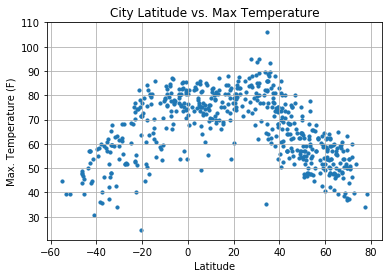

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()


### Latitude vs. Humidity Plot

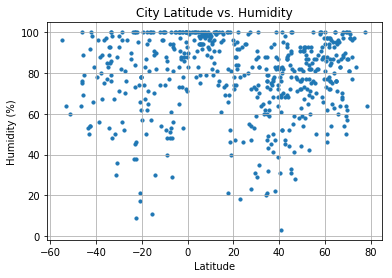

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Humidity_vs_Latitude.png")

# Show plot
plt.show()



### Latitude vs. Cloudiness Plot

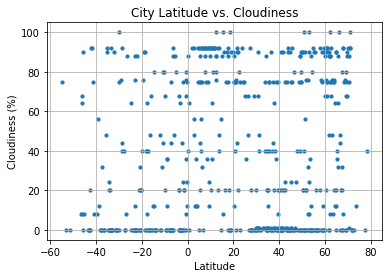

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()



### Latitude vs. Wind Speed Plot


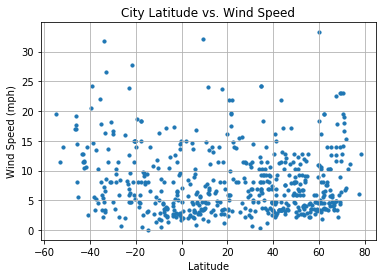

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Plots/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()
